In [1]:
import pandas as pd

In [2]:
vacancies_2020 = pd.read_csv('data/vacancies_2020.csv')
vacancies_2024 = pd.read_csv('data/vacancies_2024.csv')

vacancies_2020_saved = vacancies_2020.copy()
vacancies_2024_saved = vacancies_2024.copy()

In [3]:
vacancies_2020 = vacancies_2020_saved.copy()
vacancies_2024 = vacancies_2024_saved.copy()

              id                                        description  \
2387    39340749  <p>Уже более восьми лет мы погружаемся в тему ...   
2388    39340769  <p>Уже более восьми лет мы погружаемся в тему ...   
2392    39340785  <p>Уже более восьми лет мы погружаемся в тему ...   
2463    39341710  <p><strong>Сбер </strong>— больше чем банк, эт...   
2526    39342494  <p>Data scientist (NLP) – Sberbank AI Lab<br /...   
...          ...                                                ...   
581963  38033408  <p>Мы находимся в поиске Data Engineer&#39;a в...   
582107  38034886  <p><strong>BP Mobile</strong> - компания, кото...   
582456  38037678  <p><em>Ищем опытного <strong>Аналитика</strong...   
582489  38037985  <p>Медиалогия разрабатывает высоконагруженные ...   
582537  38038853  <p>В связи с расширением портфеля задач мы отк...   

                                               key_skills schedule_id  \
2387    Python\nAgile Project Management\nРазработка т...     fullDay   
2

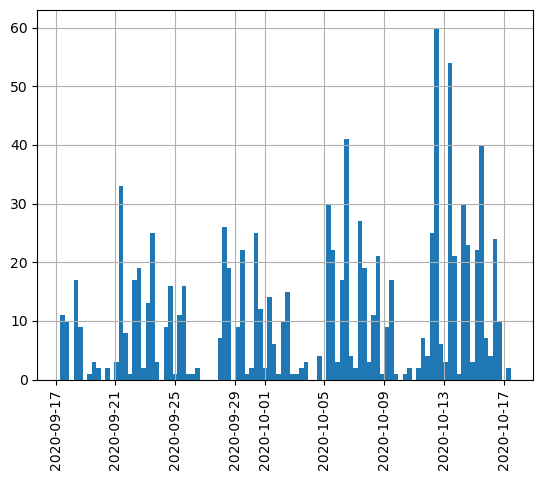

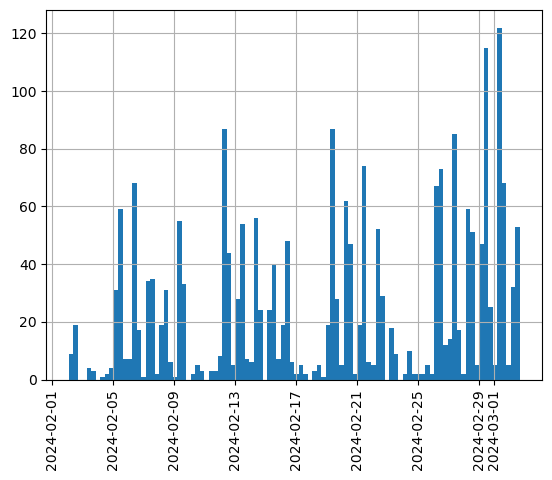

In [4]:
import re

words_to_match = ['Data scientist', 'Data analyst', 'ML', 'AI', 'Machine Learning', 'Artificial Intelligence',
                  'Аналитик данных', 'Data Engineer', 'Инженер данных', 'Reinforcement learning',
                  'Аналитик-исследователь', 'Нейросеть', 'Искусственный интеллект', 'Машинное обучение']

pattern = '|'.join(rf'\b{re.escape(word)}\b' for word in words_to_match)

vacancies_2020 = vacancies_2020[vacancies_2020['name'].str.contains(pattern, case=False, regex=True)]

# drop archived vacancies
vacancies_2020 = vacancies_2020[vacancies_2020['archived'] == False]
vacancies_2024 = vacancies_2024[vacancies_2024['archived'] == False]

print(vacancies_2020)
print(vacancies_2024)
print(vacancies_2020['area_id'].nunique())
print(vacancies_2024['area'].nunique())

# plot the distribution of published_at
import matplotlib.pyplot as plt

# use x as the date and y as the count of vacancies
vacancies_2020['published_at'] = pd.to_datetime(vacancies_2020['published_at'])
vacancies_2024['published_at'] = pd.to_datetime(vacancies_2024['published_at'])

vacancies_2020 = vacancies_2020['2020-09-17' < vacancies_2020['published_at']]
vacancies_2020 = vacancies_2020[vacancies_2020['published_at'] < '2020-10-18']

# minimum and maximum published_at
print(vacancies_2020['published_at'].min())
print(vacancies_2020['published_at'].max())
print(vacancies_2024['published_at'].min())
print(vacancies_2024['published_at'].max())

vacancies_2020['published_at'].hist(bins=100)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

vacancies_2024['published_at'].hist(bins=100)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [5]:
vacancies_2020.head(50)

,id,description,key_skills,schedule_id,schedule_name,accept_handicapped,accept_kids,experience_id,experience_name,specializations,...,address_lng,alternate_url,apply_alternate_url,code,department_id,department_name,employment_id,employment_name,prof_classes_found,terms_found
2387,39340749,<p>Уже более восьми лет мы погружаемся в тему ...,Python\nAgile Project Management\nРазработка т...,fullDay,Полный день,False,False,moreThan6,Более 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,60.493872,https://hh.ru/vacancy/39340749,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist teamlead,машинное_обучение team macbook наставник qa pa...
2388,39340769,<p>Уже более восьми лет мы погружаемся в тему ...,Python\nAgile Project Management\nРазработка т...,fullDay,Полный день,False,False,moreThan6,Более 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,NaN,https://hh.ru/vacancy/39340769,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist teamlead,машинное_обучение team macbook наставник qa pa...
2392,39340785,<p>Уже более восьми лет мы погружаемся в тему ...,Python\nAgile Project Management\nРазработка т...,fullDay,Полный день,False,False,moreThan6,Более 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,NaN,https://hh.ru/vacancy/39340785,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist teamlead,машинное_обучение team macbook наставник qa pa...
2463,39341710,"<p><strong>Сбер </strong>— больше чем банк, эт...",NaN,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,1.395 Банковское ПО 1 Информационные технологи...,...,NaN,https://hh.ru/vacancy/39341710,https://hh.ru/applicant/vacancy_response?vacan...,NaN,3529-3529-prof,Сбер для экспертов,full,Полная занятость,analyst teamlead,team agile spark e2e team_lead teradata hive с...
2526,39342494,<p>Data scientist (NLP) – Sberbank AI Lab<br /...,NaN,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,1.395 Банковское ПО 1 Информационные технологи...,...,NaN,https://hh.ru/vacancy/39342494,https://hh.ru/applicant/vacancy_response?vacan...,NaN,3529-3529-prof,Сбер для экспертов,full,Полная занятость,data_scientist,data_mining современный_офис team artificial_i...
2533,39342560,<p><strong>About team:</strong><br />On the Pr...,Python\nMS Access\nProject management\nMS Powe...,fullDay,Полный день,False,False,between3And6,От 3 до 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,27.478845,https://hh.ru/vacancy/39342560,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist,team artificial_intelligence обратная_связь da...
2535,39342570,<p><strong>About Us</strong><br />IHS Markit i...,Python\nMachine Learning\nNLP\nTensorflow\nDee...,fullDay,Полный день,False,False,between3And6,От 3 до 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,27.478845,https://hh.ru/vacancy/39342570,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist,машинное_обучение team cloud artificial_intell...
2620,39342925,<p>Стабильной компании специализирующейся на р...,C++\nMachine learning\nCUDA\nOpenCV\nNeural Ne...,flexible,Гибкий график,True,False,between3And6,От 3 до 6 лет,"1.475 Игровое ПО 1 Информационные технологии, ...",...,37.533786,https://hh.ru/vacancy/39342925,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,machine_learner,opencv комфортный_офис scipy numpy машинное_об...
2790,39343407,<p><strong>Обязанности:</strong></p><p> </p><u...,NaN,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,1.395 Банковское ПО 1 Информационные технологи...,...,NaN,https://hh.ru/vacancy/39343407,https://hh.ru/applicant/vacancy_response?vacan...,NaN,3529-3529-it,Сбер. IT,full,Полная занятость,analyst,pandas python numpy github git confluence тест...
2887,39344655,<em><strong>Чем пред

In [6]:
vacancies_2024.head(50)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,show_logo_in_search
0,0,93953781,False,Junior Data Scientist,NaN,False,False,"{'id': '74', 'name': 'Польша', 'url': 'https:/...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
1,1,93953782,False,Junior Data Scientist,NaN,False,False,"{'id': '146', 'name': 'Сербия', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
2,2,92770845,False,Junior Data Engineer,NaN,False,False,"{'id': '13', 'name': 'Армения', 'url': 'https:...","{'from': None, 'to': 900, 'currency': 'EUR', '...","{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
3,3,93953780,False,Junior Data Scientist,NaN,False,False,"{'id': '13', 'name': 'Армения', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
4,4,94019232,False,"Разработчик операций AI, Python/React (Удаленн...",NaN,False,False,"{'id': '146', 'name': 'Сербия', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
5,5,94137061,False,Data Engineer for Swedish automotive company,NaN,False,False,"{'id': '149', 'name': 'Швеция', 'url': 'https:...","{'from': 4300, 'to': 5100, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
6,6,93360510,False,Data Engineer (Remote),NaN,False,False,"{'id': '109', 'name': 'Эстония', 'url': 'https...","{'from': 3000, 'to': None, 'currency': 'EUR', ...","{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
7,7,93308666,False,Data Analyst,NaN,False,False,"{'id': '146', 'name': 'Сербия', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
8,8,93301944,False,Data Analyst (Middle/Middle+),NaN,False,False,"{'id': '146', 'name': 'Сербия', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
9,9,93293929,False,Data Scientist (uplift),NaN,False,False,"{'id': '146', 'name': 'Сербия', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN


In [7]:
vacancies_2020.info()
vacancies_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 2387 to 582456
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype                                
---  ------                     --------------  -----                                
 0   id                         997 non-null    int64                                
 1   description                997 non-null    object                               
 2   key_skills                 774 non-null    object                               
 3   schedule_id                997 non-null    object                               
 4   schedule_name              997 non-null    object                               
 5   accept_handicapped         997 non-null    bool                                 
 6   accept_kids                997 non-null    bool                                 
 7   experience_id              997 non-null    object                               
 8   experience_name         

In [8]:
# print 3 rows with all columns for both dataframes, not just some columns
cols = vacancies_2020.columns
for col in cols:
    print(col)
    print(vacancies_2020[col].head(3))

print(vacancies_2020.info())

id
2387    39340749
2388    39340769
2392    39340785
Name: id, dtype: int64
description
2387    <p>Уже более восьми лет мы погружаемся в тему ...
2388    <p>Уже более восьми лет мы погружаемся в тему ...
2392    <p>Уже более восьми лет мы погружаемся в тему ...
Name: description, dtype: object
key_skills
2387    Python\nAgile Project Management\nРазработка т...
2388    Python\nAgile Project Management\nРазработка т...
2392    Python\nAgile Project Management\nРазработка т...
Name: key_skills, dtype: object
schedule_id
2387    fullDay
2388    fullDay
2392    fullDay
Name: schedule_id, dtype: object
schedule_name
2387    Полный день
2388    Полный день
2392    Полный день
Name: schedule_name, dtype: object
accept_handicapped
2387    False
2388    False
2392    False
Name: accept_handicapped, dtype: bool
accept_kids
2387    False
2388    False
2392    False
Name: accept_kids, dtype: bool
experience_id
2387    moreThan6
2388    moreThan6
2392    moreThan6
Name: experience_id, dtype: objec

In [9]:
cols = vacancies_2024.columns
for col in cols:
    print(col)
    print(vacancies_2024[col].tail(3))

print(vacancies_2024.info())

Unnamed: 0
2286    2286
2287    2287
2288    2288
Name: Unnamed: 0, dtype: int64
id
2286    92026913
2287    93680579
2288    91237923
Name: id, dtype: int64
premium
2286    False
2287    False
2288    False
Name: premium, dtype: bool
name
2286                                        Data engineer
2287    Продакт Разработчик Python/React, AI OPS(Удале...
2288              Senior Data Analyst in Technology group
Name: name, dtype: object
department
2286    NaN
2287    NaN
2288    NaN
Name: department, dtype: object
has_test
2286    False
2287    False
2288    False
Name: has_test, dtype: bool
response_letter_required
2286    False
2287    False
2288    False
Name: response_letter_required, dtype: bool
area
2286    {'id': '2759', 'name': 'Ташкент', 'url': 'http...
2287    {'id': '2759', 'name': 'Ташкент', 'url': 'http...
2288    {'id': '2759', 'name': 'Ташкент', 'url': 'http...
Name: area, dtype: object
salary
2286                                                  NaN
2287    {'from': 2200

In [10]:
# all columns that not mentioned are dropped

# 'premium' - don't change
# 'name' - don't change
# 'department' - take id and name (from 2024) and department_id and department_name (from 2020)
# 'has_test' - don't change
# 'response_letter_required' - don't change
# 'area' - get only id and name (from j2024) and area_id and area_name (from 2020)
# 'salary' - get all columns (from 2024) and salary_from, salary_to, salary_currency, salary_gross (from 2020)
# 'type' - get only id (from 2024) and type_id (from 2020)
# 'address' - reformat to get only bool value if it's not null for 2024 and drop for 2020, adding a new column 'is_address' with the bool value
# 'insider_interview' - reformat to get only bool value if it's not null for 2024 and drop for 2020, adding a new column 'is_insider_interview' with the bool value
# 'employer' - get only name (from 2024) and employer_id and employer_name (from 2020) because the id is the same for both dataframes for the same employer and there is a problem with id format in 2024
# 'schedule' - get only id (from 2024) and schedule_id (from 2020)
# 'experience' - get only id (from 2024) and experience_id (from 2020)
# 'employment' - get only id (from 2024) and employment_id (from 2020)


adjusted_2020 = vacancies_2020[
    ['premium', 'name', 'department_id', 'department_name', 'area_id', 'area_name', 'has_test',
     'response_letter_required', 'salary_from', 'salary_to', 'salary_currency', 'salary_gross', 'type_id',
     'address_city', 'insider_interview', 'employer_name', 'schedule_id', 'experience_id', 'employment_id']]
adjusted_2024 = vacancies_2024[
    ['premium', 'name', 'department', 'area', 'has_test', 'response_letter_required', 'salary', 'type', 'address',
     'insider_interview', 'employer', 'schedule', 'experience', 'employment']]


def get_columns_from_json(df, column_name, needed_columns):
    df[column_name] = df[column_name].apply(lambda x: eval(x) if pd.notnull(x) else x)
    for i, column in enumerate(needed_columns):
        df[f'{column_name}_{column}'] = df[column_name].apply(lambda x: x[column] if pd.notnull(x) else x)
    df = df.drop(columns=[column_name])
    return df


adjusted_2024 = get_columns_from_json(adjusted_2024, 'department', ['id', 'name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'area', ['id', 'name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'salary', ['from', 'to', 'currency', 'gross'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'type', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'employer', ['name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'schedule', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'experience', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'employment', ['id'])

adjusted_2024['is_address'] = adjusted_2024['address'].notnull()
adjusted_2024 = adjusted_2024.drop(columns=['address'])
adjusted_2020['is_address'] = adjusted_2020['address_city'].notnull()
adjusted_2020 = adjusted_2020.drop(columns=['address_city'])
adjusted_2024['is_insider_interview'] = adjusted_2024['insider_interview'].notnull()
adjusted_2024 = adjusted_2024.drop(columns=['insider_interview'])
adjusted_2020['is_insider_interview'] = adjusted_2020['insider_interview'].notnull()
adjusted_2020 = adjusted_2020.drop(columns=['insider_interview'])

C:\Users\sasha\AppData\Local\Temp\ipykernel_12116\1092228861.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: eval(x) if pd.notnull(x) else x)
C:\Users\sasha\AppData\Local\Temp\ipykernel_12116\1092228861.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column_name}_{column}'] = df[column_name].apply(lambda x: x[column] if pd.notnull(x) else x)
C:\Users\sasha\AppData\Local\Temp\ipykernel_12116\1092228861.py:31: SettingWithCopyWarning: 
A value i

In [12]:
# currency exchange rate
import yfinance as yf

# get needed currencies list
currencies2020 = adjusted_2020['salary_currency'].unique()
currencies2024 = adjusted_2024['salary_currency'].unique()
currencies2020 = [currency for currency in currencies2020 if type(currency) == str and currency != 'RUR']
currencies2024 = [currency for currency in currencies2024 if type(currency) == str and currency != 'RUR']

def load(currency, start_date, end_date):
    data = yf.download(currency + 'RUB=X', start=start_date, end=end_date, period='1d')
    if len(data) == 0:
        data = yf.download(currency + '=X', start=start_date, end=end_date, period='1d')
        data['Close'] = 1 / data['Close']
        data1 = yf.download('USDRUB=X', start=start_date, end=end_date, period='1d')
        data['Close'] = data['Close'] * data1['Close']
    data.dropna(inplace=True)
    return data['Close'].mean()

currency_to_rub_2020 = {}
currency_to_rub_2024 = {}

# get exchange rates
for currency in currencies2020:
    data = load(currency, '2020-09-17', '2020-10-17')
    currency_to_rub_2020[currency] = data

for currency in currencies2024:
    data = load(currency, '2024-02-02', '2024-03-02')
    currency_to_rub_2024[currency] = data

print(currency_to_rub_2020)
print(currency_to_rub_2024)

# get manually from yahoo finance
currency_to_rub_2024['BYR'] = 27.779816513761468
currency_to_rub_2024['KGS'] = 1.0161073825503356

# convert all currencies to RUB
adjusted_2020['salary_from_rub'] = adjusted_2020.apply(
    lambda row: row['salary_from'] * currency_to_rub_2020[row['salary_currency']] if row['salary_currency'] in currency_to_rub_2020 else row['salary_from'], axis=1)
adjusted_2020['salary_to_rub'] = adjusted_2020.apply(
    lambda row: row['salary_to'] * currency_to_rub_2020[row['salary_currency']] if row['salary_currency'] in currency_to_rub_2020 else row['salary_to'], axis=1)
adjusted_2024['salary_from_rub'] = adjusted_2024.apply(
    lambda row: row['salary_from'] * currency_to_rub_2024[row['salary_currency']] if row['salary_currency'] in currency_to_rub_2024 else row['salary_from'], axis=1)
adjusted_2024['salary_to_rub'] = adjusted_2024.apply(
    lambda row: row['salary_to'] * currency_to_rub_2024[row['salary_currency']] if row['salary_currency'] in currency_to_rub_2024 else row['salary_to'], axis=1)

# TODO: WTF is that?
adjusted_2020['salary_currency' == 'RUR', 'salary_from_rub'] = adjusted_2020['salary_from']
adjusted_2020['salary_currency' == 'RUR', 'salary_to_rub'] = adjusted_2020['salary_to']
adjusted_2024['salary_currency' == 'RUR', 'salary_from_rub'] = adjusted_2024['salary_from']
adjusted_2024['salary_currency' == 'RUR', 'salary_to_rub'] = adjusted_2024['salary_to']

print(adjusted_2020.salary_from_rub, adjusted_2020.salary_to_rub, adjusted_2020.salary_from, adjusted_2020.salary_to, adjusted_2020.salary_currency)
print(adjusted_2024.salary_from_rub, adjusted_2024.salary_to_rub, adjusted_2024.salary_from, adjusted_2024.salary_to, adjusted_2024.salary_currency)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KZTRUB=X']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['UAHRUB=X']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BYRRUB=X']: Exception

{'EUR': 90.7302176735618, 'USD': 77.23126359419389, 'KZT': 0.1815296285874559, 'UAH': 2.7564894490608105}
{'EUR': 98.82568976992653, 'USD': 91.65952410016742, 'BYR': nan, 'KZT': 0.20459808154706083, 'KGS': nan, 'UZS': 0.007372376710979549}
2387     NaN
2388     NaN
2392     NaN
2463     NaN
2526     NaN
          ..
576926   NaN
577341   NaN
581963   NaN
582107   NaN
582456   NaN
Name: salary_from_rub, Length: 997, dtype: float64 2387     NaN
2388     NaN
2392     NaN
2463     NaN
2526     NaN
          ..
576926   NaN
577341   NaN
581963   NaN
582107   NaN
582456   NaN
Name: salary_to_rub, Length: 997, dtype: float64 2387     NaN
2388     NaN
2392     NaN
2463     NaN
2526     NaN
          ..
576926   NaN
577341   NaN
581963   NaN
582107   NaN
582456   NaN
Name: salary_from, Length: 997, dtype: float64 2387     NaN
2388     NaN
2392     NaN
2463     NaN
2526     NaN
          ..
576926   NaN
577341   NaN
581963   NaN
582107   NaN
582456   NaN
Name: salary_to, Length: 997, dtype: floa

In [13]:
# save the dataframes to csv
adjusted_2020.to_csv('data/adjusted_vacancies_2020.csv', index=False)
adjusted_2024.to_csv('data/adjusted_vacancies_2024.csv', index=False)

In [14]:
# load the dataframes from csv
adjusted_2020 = pd.read_csv('data/adjusted_vacancies_2020.csv')
adjusted_2024 = pd.read_csv('data/adjusted_vacancies_2024.csv')

In [16]:
adjusted_2020.head(50)

,premium,name,department_id,department_name,area_id,area_name,has_test,response_letter_required,salary_from,salary_to,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Team Lead/Senior Data Scientist,NaN,NaN,3,Екатеринбург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,True,False,NaN,NaN,NaN,NaN
1,False,Team Lead/Senior Data Scientist,NaN,NaN,2,Санкт-Петербург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
2,False,Team Lead/Senior Data Scientist,NaN,NaN,1,Москва,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
3,False,Team Lead/Senior Data Analyst. Аналитик данных,3529-3529-prof,Сбер для экспертов,3,Екатеринбург,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
4,False,Data scientist (NLP) - Sberbank AI Lab,3529-3529-prof,Сбер для экспертов,1,Москва,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
5,False,Data Engineer (Information Retrieval Team),NaN,NaN,1002,Минск,False,False,NaN,NaN,...,IHS Global,fullDay,between3And6,full,True,False,NaN,NaN,NaN,NaN
6,False,Senior Data Scientist (Computer Vision),NaN,NaN,1002,Минск,False,False,NaN,NaN,...,IHS Global,fullDay,between3And6,full,True,False,NaN,NaN,NaN,NaN
7,False,Ведущий специалист по Machine learning (3D-алг...,NaN,NaN,1,Москва,False,False,250000.0,NaN,...,Адалиск,flexible,between3And6,full,True,False,250000.0,NaN,250000.0,NaN
8,False,Аналитик ИСУ (Data Analyst),3529-3529-it,Сбер. IT,26,Воронеж,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
9,False,Аналитик данных,NaN,NaN,88,Казань,False,False,NaN,NaN,...,АК БАРС ДОМ,fullDay,between1And3,full,True,False,NaN,NaN,NaN,NaN
